Caracterização meteorológica da área de estudo

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade \
   
Meteorologia de superfície \

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .


In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório atual
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs', 'meteoSuperficie')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)


D:\ENS5173_01
D:\ENS5173_01\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [13]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [27]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

datetime
2021-01-01 00:00:00   2021-01-01 00:00:00
2021-01-01 01:00:00   2021-01-01 01:00:00
2021-01-01 02:00:00   2021-01-01 02:00:00
2021-01-01 03:00:00   2021-01-01 03:00:00
2021-01-01 04:00:00   2021-01-01 04:00:00
                              ...        
2023-12-31 19:00:00   2023-12-31 19:00:00
2023-12-31 20:00:00   2023-12-31 20:00:00
2023-12-31 21:00:00   2023-12-31 21:00:00
2023-12-31 22:00:00   2023-12-31 22:00:00
2023-12-31 23:00:00   2023-12-31 23:00:00
Name: datetime, Length: 17518, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


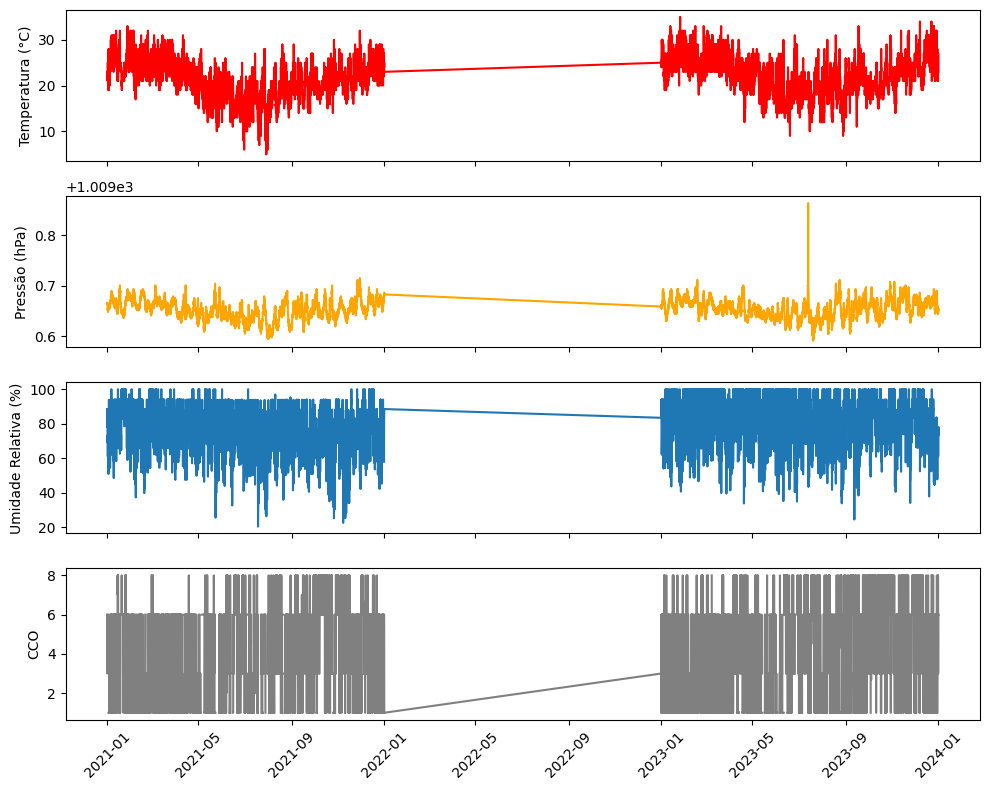

In [4]:
# Analisando os dados através de figuras
# Criar uma coluna com Datetime dos dados
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Analisar os dados através de figuras
fig, ax = plt.subplots(4, sharex=True, figsize=(10, 8))

# Plotagem da temperatura
ax[0].plot(metSuperficie.index, metSuperficie['temp'], color='red')
ax[0].set_ylabel('Temperatura (°C)')

# Plotagem da pressão
ax[1].plot(metSuperficie.index, metSuperficie['p'], color='orange')
ax[1].set_ylabel('Pressão (hPa)')

# Plotagem da umidade relativa
ax[2].plot(metSuperficie.index, metSuperficie['relh'])
ax[2].set_ylabel('Umidade Relativa (%)')

# Plotagem da cco
ax[3].plot(metSuperficie.index, metSuperficie['cco'], color='gray')
ax[3].set_ylabel('CCO')
ax[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Estatísticas dos dados
import pandas as pd

# Definir 'datetime' como o índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Calcular a média mensal dos dados
media_mensal = metSuperficie.resample('M').mean()
media_mensal = metSuperficie.resample('ME').mean()

# Exibir as estatísticas
print(media_mensal)


In [ ]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()


In [ ]:
# analisando direção dos ventos a partir de uma rosa dos ventos


import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir o caminho do diretório com os arquivos
dir_path = r'D:\ENS5173_01\inputs\meteoSuperficie'

# Listar os arquivos no diretório
files = os.listdir(dir_path)

# Inicializar uma lista para armazenar os DataFrames de cada arquivo
dfs = []

# Iterar sobre os arquivos e ler os dados
for file in files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar os DataFrames em um único DataFrame
metSuperficie = pd.concat(dfs, ignore_index=True)

# Analisar os dados de direção do vento
wd_counts = metSuperficie['wd'].value_counts()

# Plotar a rosa dos ventos
directions = wd_counts.index.map(int)
frequencies = wd_counts.values

# Nomes das direções do vento em inglês
wind_directions = {
    0: 'N', 45: 'NE', 90: 'E', 135: 'SE', 180: 'S', 225: 'SW', 270: 'W', 315: 'NW'
}

# Converter as direções para radianos
angles = np.radians(directions)

# Criar o gráfico
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_direction(-1)  # Sentido anti-horário
ax.set_theta_zero_location('N')  # Norte no topo

# Cores para cada direção do vento
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Plotar as barras para cada direção do vento
for angle, freq, color in zip(angles, frequencies, colors):
    angle = angle % (2 * np.pi)  # Certificar-se de que o ângulo está no intervalo correto
    rounded_angle = int(np.round(np.degrees(angle) / 45) * 45)  # Arredondar para a direção do vento mais próxima
    ax.bar(angle, freq, width=0.3, color=color, edgecolor='black', label=wind_directions.get(rounded_angle, ''))

# Adicionar legenda
ax.legend(loc='upper right')

plt.show()


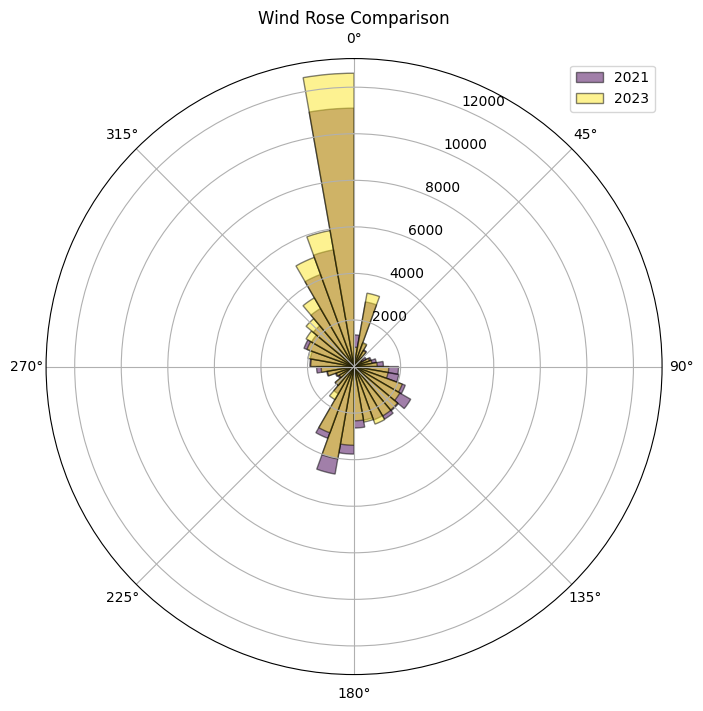

In [39]:
#  rosa dos ventos :observando as direcoes do vento (wd), comparando dos ventos de cada ano

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir o caminho do diretório com os arquivos
dir_path = r'D:\ENS5173_01\inputs\meteoSuperficie'

# Listar os arquivos no diretório
files = os.listdir(dir_path)

# Filtrar os arquivos para selecionar apenas os arquivos relevantes
relevant_files = [file for file in files if file.startswith('metar_')]

# Inicializar uma lista para armazenar os DataFrames de cada arquivo
dfs = []

# Iterar sobre os arquivos relevantes e ler os dados
for file in relevant_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar os DataFrames em um único DataFrame
metSuperficie = pd.concat(dfs, ignore_index=True)

# Converter a coluna de data para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Filtrar os dados por ano (2021, 2022, 2023)
years = metSuperficie.index.year.unique()

# Plotar rosa dos ventos para cada ano
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)  # Sentido anti-horário
ax.set_theta_zero_location('N')  # Norte no topo

# Cores para cada ano
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

for year, color in zip(years, colors):
    df_year = metSuperficie[metSuperficie.index.year == year]
    wind_directions = df_year['wd'].dropna().values
    wind_speeds = np.ones_like(wind_directions) * 10  # Velocidade do vento para todas as direções
    ax.hist(np.radians(wind_directions), bins=36, weights=wind_speeds, color=color, edgecolor='black', alpha=0.5, label=year)

# Adicionar legenda
plt.legend(loc='upper right')

plt.title('Wind Rose Comparison')
plt.show()


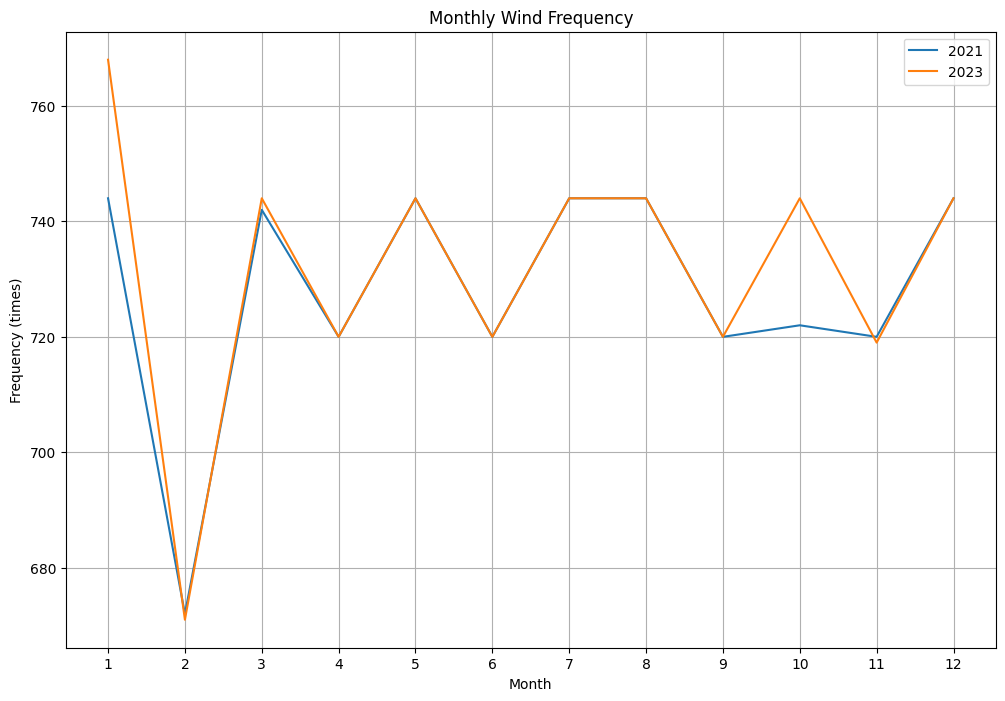

Year: 2021
Mean Wind Direction: 214.92048565646948 degrees
Maximum Wind Direction: 360.0 degrees
Minimum Wind Direction: 0.0 degrees
Year: 2023
Mean Wind Direction: 225.14838339467332 degrees
Maximum Wind Direction: 360.0 degrees
Minimum Wind Direction: 0.0 degrees


In [41]:
# calcular as médias, máximas e mínimas do vento e depois criar um gráfico mostrando a incidência dos ventos mais frequentes em cada mês de cada ano

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir o caminho do diretório com os arquivos
dir_path = r'D:\ENS5173_01\inputs\meteoSuperficie'

# Listar os arquivos no diretório
files = os.listdir(dir_path)

# Filtrar os arquivos para selecionar apenas os arquivos relevantes
relevant_files = [file for file in files if file.startswith('metar_')]

# Inicializar uma lista para armazenar os DataFrames de cada arquivo
dfs = []

# Iterar sobre os arquivos relevantes e ler os dados
for file in relevant_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar os DataFrames em um único DataFrame
metSuperficie = pd.concat(dfs, ignore_index=True)

# Converter a coluna de data para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Filtrar os dados por ano (2021, 2022, 2023)
years = metSuperficie.index.year.unique()

# Calcular média, máximo e mínimo do vento para cada ano
wind_stats = {}
for year in years:
    df_year = metSuperficie[metSuperficie.index.year == year]
    wind_stats[year] = {
        'mean': df_year['wd'].mean(),
        'max': df_year['wd'].max(),
        'min': df_year['wd'].min()
    }

# Plotar gráfico de barras mostrando os ventos mais frequentes em cada mês de cada ano
plt.figure(figsize=(12, 8))
for year in years:
    df_year = metSuperficie[metSuperficie.index.year == year]
    monthly_counts = df_year['month'].value_counts().sort_index()
    plt.plot(monthly_counts.index, monthly_counts.values, label=f'{year}')

plt.xlabel('Month')
plt.ylabel('Frequency (times)')
plt.title('Monthly Wind Frequency')
plt.legend()
plt.xticks(np.arange(1, 13))
plt.grid(True)
plt.show()

# Exibir estatísticas dos ventos
for year, stats in wind_stats.items():
    print(f"Year: {year}")
    print(f"Mean Wind Direction: {stats['mean']} degrees")
    print(f"Maximum Wind Direction: {stats['max']} degrees")
    print(f"Minimum Wind Direction: {stats['min']} degrees")



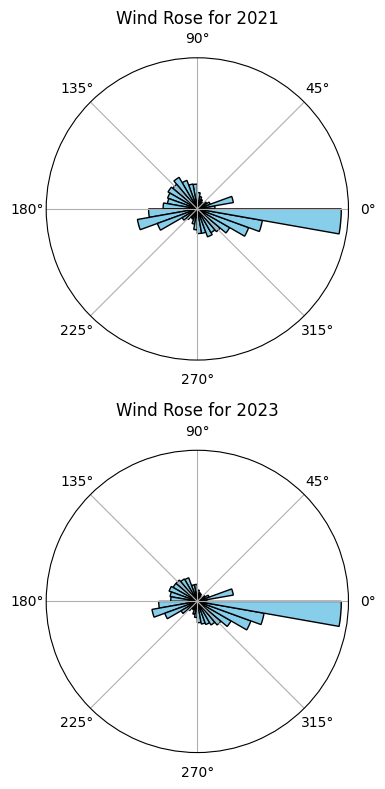

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir o caminho do diretório com os arquivos
dir_path = r'D:\ENS5173_01\inputs\meteoSuperficie'

# Listar os arquivos no diretório
files = os.listdir(dir_path)

# Filtrar os arquivos para selecionar apenas os arquivos relevantes
relevant_files = [file for file in files if file.startswith('metar_')]

# Inicializar uma lista para armazenar os DataFrames de cada arquivo
dfs = []

# Iterar sobre os arquivos relevantes e ler os dados
for file in relevant_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar os DataFrames em um único DataFrame
metSuperficie = pd.concat(dfs, ignore_index=True)

# Converter a coluna de data para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Filtrar os dados por ano (2021, 2022, 2023)
years = metSuperficie.index.year.unique()

# Plotar diagrama de raios para cada ano
plt.figure(figsize=(12, 8))
for year in years:
    df_year = metSuperficie[metSuperficie.index.year == year]
    wind_directions = df_year['wd'].dropna()
    wind_speeds = np.ones_like(wind_directions)
    plt.subplot(2, 2, year-2020, polar=True)
    plt.hist(np.radians(wind_directions), bins=36, weights=wind_speeds, color='skyblue', edgecolor='black')
    plt.title(f'Wind Rose for {year}')
    plt.yticks([])
    plt.grid(True)

plt.tight_layout()
plt.show()


O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:8.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c8263b3c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8263b5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8263a2f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8263b6b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8263b76d0>],
 'means': []}

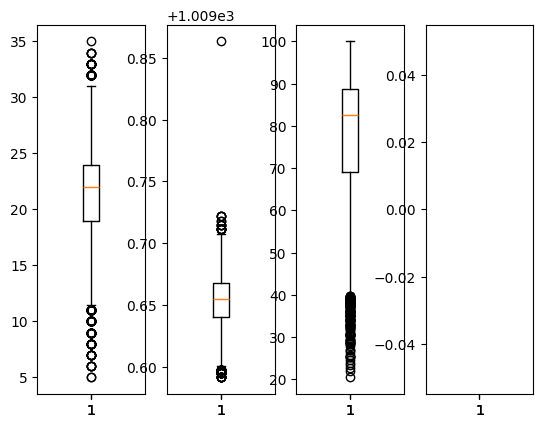

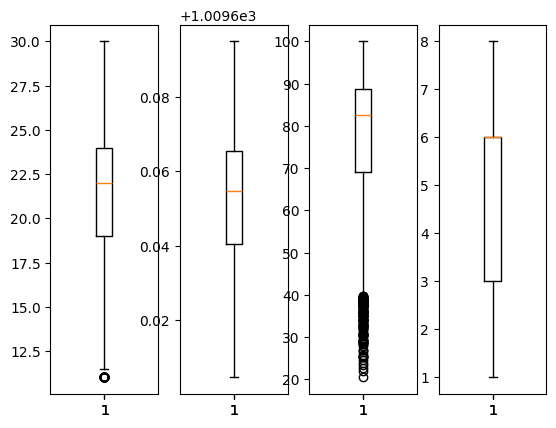

In [5]:
# Fazendo boxplot das variáveis
import numpy as np
import matplotlib.pyplot as plt

# Fazendo boxplot das variáveis
fig, ax = plt.subplots(1, 4, sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é:' + str(p99))
cco99 = np.nanpercentile(metSuperficie['cco'], 99)
print('O percentil 99 da cco é:' + str(cco99))

fig, ax = plt.subplots(1, 4, sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                    (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                  (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])


C:\Users\PC\AppData\Local\Temp\ipykernel_2544\3580486198.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_2544\3580486198.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


            day  month    year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                               
2021-01-31  1.0    1.0  2021.0   0.0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-02-28  1.0    2.0  2021.0   0.0 NaN  0.0  0.0  243.84  1.0  1.0   
2021-03-31  1.0    3.0  2021.0   0.0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-04-30  1.0    4.0  2021.0   0.0 NaN  0.0  0.0  182.88  1.0  1.0   
2021-05-31  1.0    5.0  2021.0   0.0 NaN  0.0  0.0  243.84  1.0  1.0   
2021-06-30  1.0    6.0  2021.0   0.0 NaN  0.0  0.0  182.88  1.0  1.0   
2021-07-31  1.0    7.0  2021.0   0.0 NaN  0.0  0.0   30.48  1.0  1.0   
2021-08-31  1.0    8.0  2021.0   0.0 NaN  0.0  0.0   30.48  1.0  1.0   
2021-09-30  1.0    9.0  2021.0   0.0 NaN  0.0  0.0  152.40  1.0  1.0   
2021-10-31  1.0   10.0  2021.0   0.0 NaN  0.0  0.0   91.44  1.0  1.0   
2021-11-30  1.0   11.0  2021.0   0.0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-12-31  1.0   12.0  2021.0   0.0 NaN  0.0  0.0  304.80  1.0 

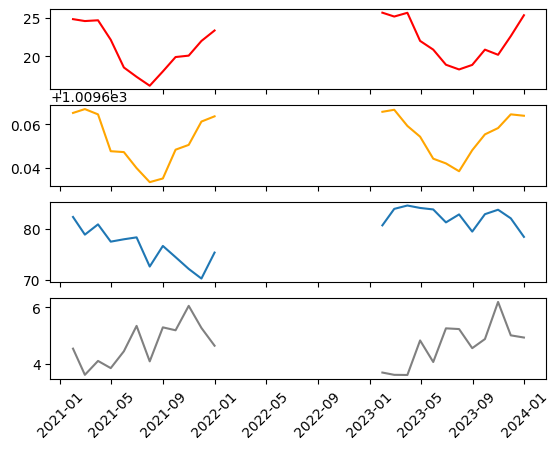

In [6]:
# Estatísticas dos dados
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

print(min_mensal)

In [ ]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

In [ ]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

In [ ]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

Análise de dados no espaço
#Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica


In [ ]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100., -111., 35, 43])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')